<a href="https://colab.research.google.com/github/youngyoonc/EDA/blob/master/Hotel_booking_demand_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
- EDA analysis of hotel booking dataset from Trivago
##  Objectives
- Create a indepth analysis to figure out the standard patterns of booking
- Generate a report to derive a strategy for the marketing team for the 2015 - 2017 data. 
## Column information
- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**: No of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**: Year of arrival date (2015-2017)
- **arrival_date_month**: Month of arrival date (Jan - Dec)
- **arrival_date_week_number**: Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** : Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking 
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)** = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**: Number of car parking spaces required by the customer 
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




## Import packages & data


In [0]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset into colab & notebook
from google.colab import files 
uploaded = files.upload()
data = pd.read_csv('hotel_bookings.csv')

Saving hotel_bookings.csv to hotel_bookings.csv


## Overview of the data 

In [0]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [0]:
data.shape

(119390, 32)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

## Number of NaN or Null values

In [0]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- high number of of NaN values in company and agent - *low* possibility of having an impact on the analysis so the 2 columns removed 


In [0]:
data = data.drop(columns = ['agent', 'company'])

- the rest of NaN values: (488 + 4) out of 119390 negligible so removed 

In [0]:
data = data.dropna(axis = 0)

# Check to see if there are any more NaN data 
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [0]:
# change children (float64) to int64 & check 
data['children'] = data['children'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             118898 non-null object
is_canceled                       118898 non-null int64
lead_time                         118898 non-null int64
arrival_date_year                 118898 non-null int64
arrival_date_month                118898 non-null object
arrival_date_week_number          118898 non-null int64
arrival_date_day_of_month         118898 non-null int64
stays_in_weekend_nights           118898 non-null int64
stays_in_week_nights              118898 non-null int64
adults                            118898 non-null int64
children                          118898 non-null int64
babies                            118898 non-null int64
meal                              118898 non-null object
country                           118898 non-null object
market_segment                    118898 non-null object
distribution_channel              118898 non

# Overview of the type of hotel
- Only 2 types (resort or city),so can use a barchart or pie chart to show

([<matplotlib.patches.Wedge at 0x7f802c73ceb8>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

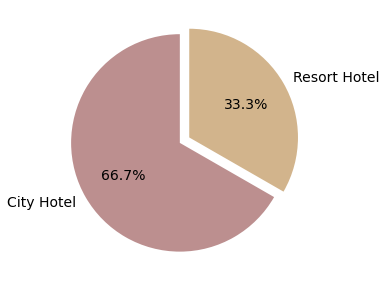

In [0]:
# Pie chart parameters 
plt.rcParams['figure.figsize'] = 5,5
explode = (0, 0.1) # how much each section is separated from each other 
colors = ['rosybrown', 'tan']

# Labels
labels = data['hotel'].value_counts().index.tolist() # convert index to list
sizes = data['hotel'].value_counts().tolist()

# Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


- It seems that a huge proportion of hotels was city hotel perhaps because:
  - resort hotels tend to be expensive  
  - resort hotels tend to be more appropriate for larger group of people 


# Overview of the number of people who booked the hotel

In [0]:
# Adults 
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [0]:
# Children
data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


- Mean values for adults and (particularly) children are higher for resort hotels which suggests that they are better choice for families 

# Overview of canceled bookings 

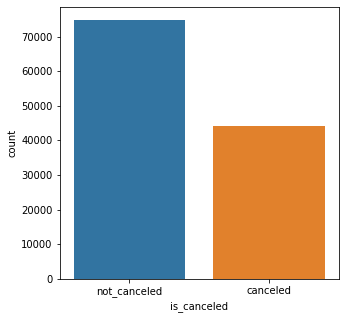

In [0]:
# replace canceled bookings [1,0] to ['canceled', 'non_canceled']
data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = data['is_canceled']
sns.countplot(canceled_data)

- majority of the bookings not canceled

## Cancellation rate among different types of hotel

Text(0.5, 1.0, 'Graph showing the number of cancellations in city and resort hotel')

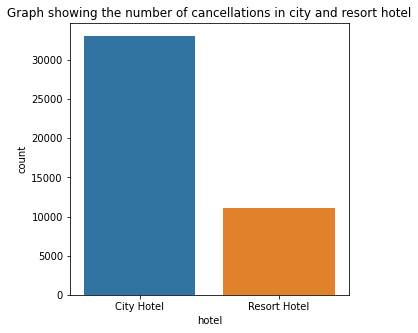

In [0]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing the number of cancellations in city and resort hotel')

- A huge proportion of cancellation from city hotel - perhaps not surprising considering 3/4 of the hotel bookings belong to city hotels

### hence better to look at the % of cancellations instead

Text(0.5, 1.0, 'Graph showing the percentage of cancellation in city and resort hotel')

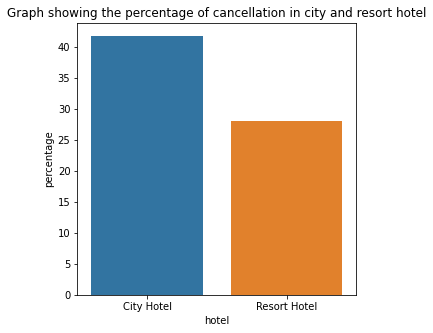

In [0]:
city_canceled_pct = (canceled_hotel.at[0,'count']/data['hotel'][data['hotel'] =='City Hotel'].count())*100 
resort_canceled_pct = (canceled_hotel.at[1,'count']/data['hotel'][data['hotel'] =='Resort Hotel'].count())*100 
canceled_hotel['percentage'] = [city_canceled_pct, resort_canceled_pct] 
sns.barplot(data=canceled_hotel, x = 'hotel', y = 'percentage').set_title('Graph showing the percentage of cancellation in city and resort hotel')

- regardless the number of actual bookings, city hotel still shows a higher % of cancellations

# Overview of arrival period

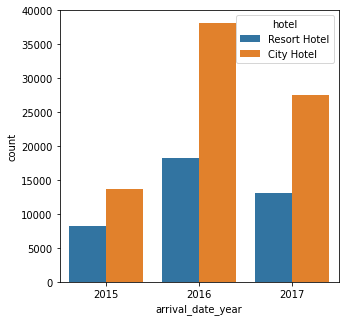

In [0]:
# Arrival year 
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']
period_arrival = data[lst3]

sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel') 

Text(0, 0.5, 'Count')

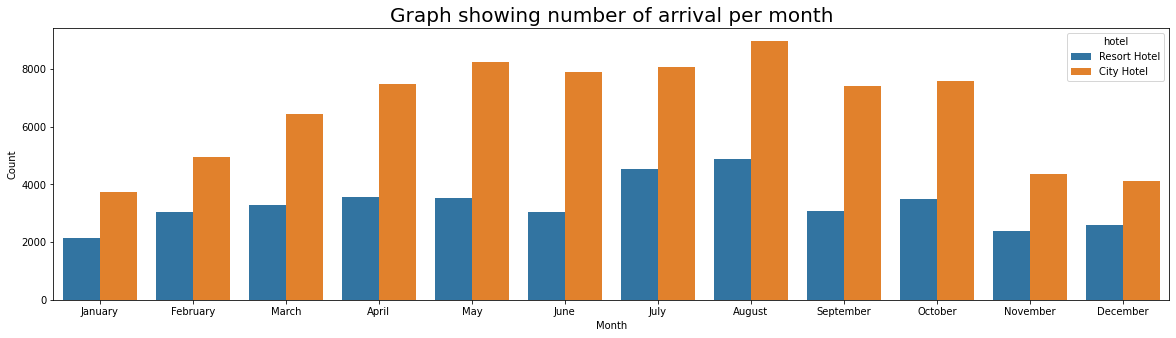

In [0]:
# Arrival month
plt.figure(figsize=(20,5)) 
sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month') 
plt.ylabel('Count') 

Text(0.5, 1.0, 'Graph showing number of arrival per day')

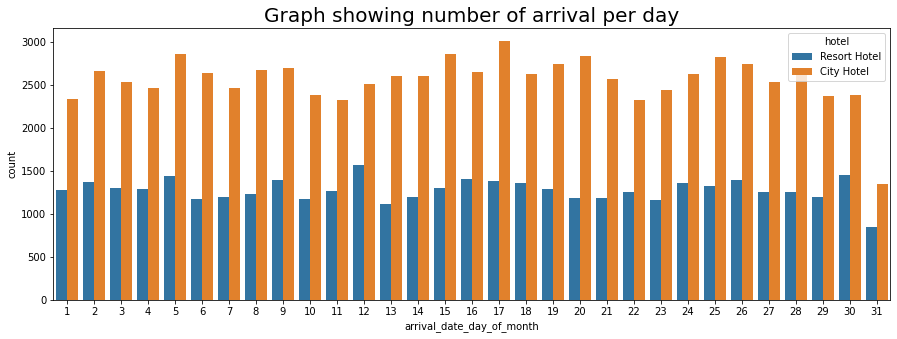

In [0]:
# Arrival day
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

## Insights
- 2016 seems to be the year where hotel booking is at its highest for both types of hotels 
- increase in booking around the middle of the year, with August being the highest - perhaps for summer holidays 
- no clear trend for arrival days - perhaps the peaks belong to weekends? 

### Let's dig deeper into whether the stay is over a weekend or weekday.

Text(0.5, 1.0, 'Number of stays on weekend nights')

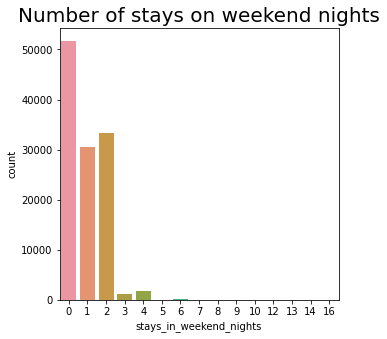

In [0]:
sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

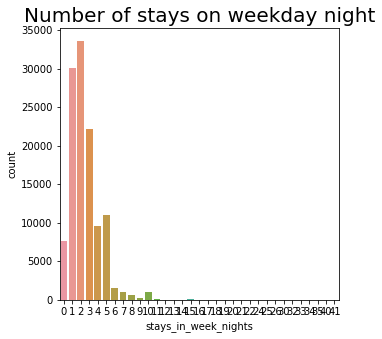

In [0]:
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

- seems that majority of the stays are over the weekday's night, meaning what we saw for the chart on day of the month was random

## Type of visitors 

Text(0.5, 1.0, 'Number of adults')

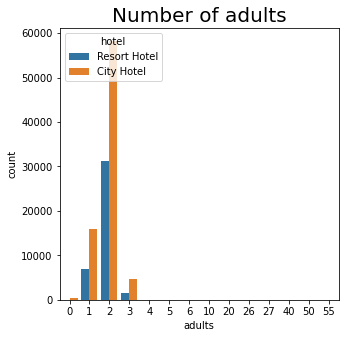

In [0]:
sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

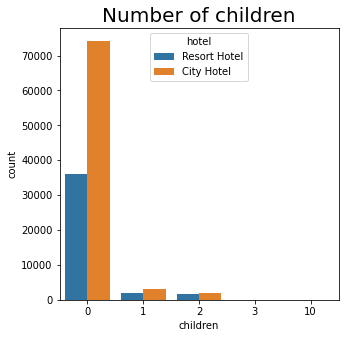

In [0]:
sns.countplot(data = data, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

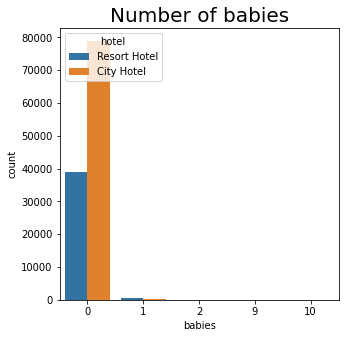

In [0]:
sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

- the majority of the visitors travel in pair
- those that children children or babies have no specific preference for the type of hotel although those with babies seem to prefer resort hotels by a fraction

# Visitors' countries of origin


In [0]:
# counting the number of visitors who did not cancel their trips, grouped by country
country_visitors = data[data['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# Using Plotly.express to plot a choropleth map
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Mint,
                    title="Home country of visitors")

- shows a huge number of visitors from western europe, namely France, UK and Portugal being the highest.
- can instruct the marketing team to target people of this region

# Market segments and distribution channel

Text(0.5, 1.0, 'Types of market segment')

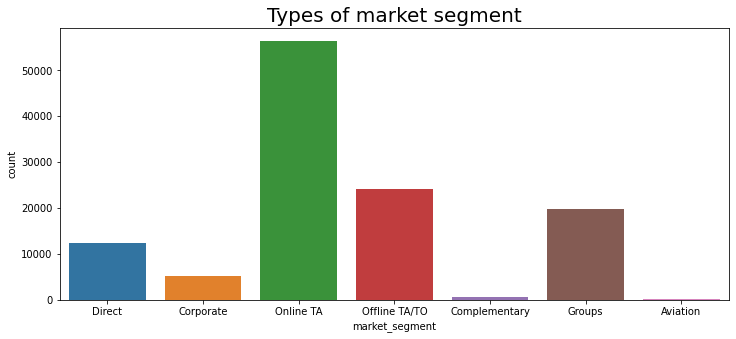

In [0]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

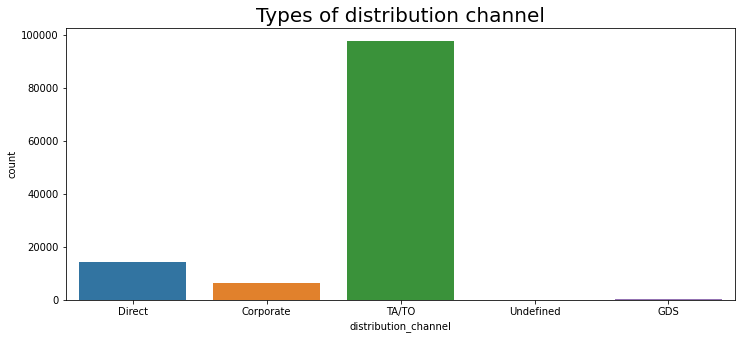

In [0]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

- Majority of the distribution channels and market segments involve travel agencies (online or offline)
- Can target the marketing to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them

# Looking into deposit types

Text(0.5, 1.0, 'Graph showing types of deposits')

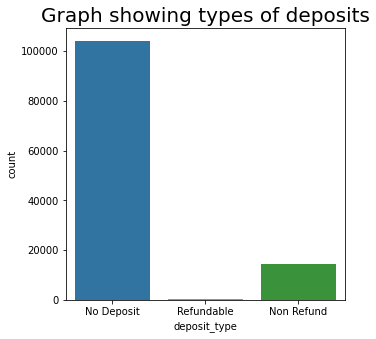

In [0]:
sns.countplot(data = data, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

- the majority of bookings did not require deposit

# Repeated guests

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

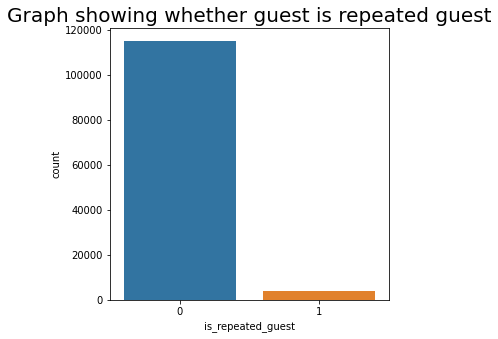

In [0]:
sns.countplot(data = data, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

- Low number of repeated guests (1)
- Need to target repeated guests since they have booked before
- Perhaps need to see why guests haven't repeated their bookings 

# Types of guests

Text(0.5, 1.0, 'Graph showing type of guest')

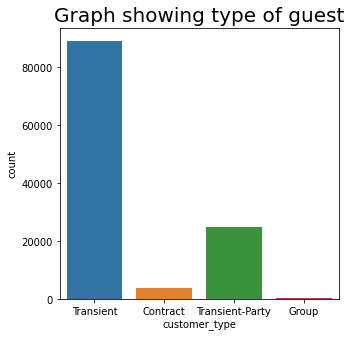

In [0]:
sns.countplot(data = data, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

- the majority of bookings are transient, meaning that the booking is neither part of a group nor a contract - most people seem to skip the middleman, perhaps to ensure quick responses from their booking 

# Prices per month per hotel
- average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- average daily rate per person =  $ \frac{ADR}{Adults + Children + Babies}$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



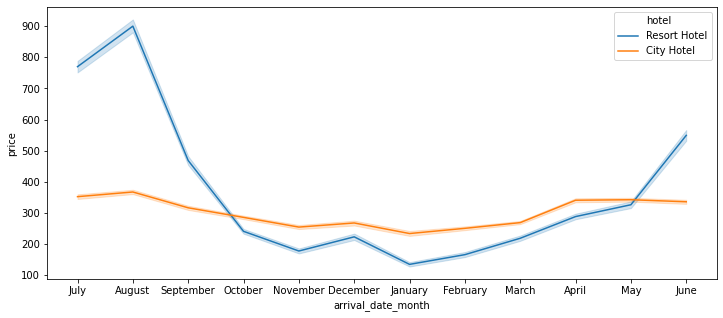

In [0]:
# Resize plot 
plt.figure(figsize=(12,5))

# Calculate average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children'] + data['babies']) 
actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', sort=False)

- Prices of resort hotel are much higher during the summer season with a small peak in December for christmas holidays 
- Prices of city hotel do not fluctuate that much over the course of the year

## Summary
- most bookings are not cancelled despite not requiring any deposit which seems surprising
- city hotels have a much higher rate of bookings and cancellations
  - would be interesting to see if the trips were for business or pleasure and whether the cancellations were business trips that got postponed/cancelled last minute
- summers seem to be the most popular season for both types of hotels
  - for resort hotels summer is the most expensive and the most popular 
  - would make sense to see the popular resort hotels being located near the beach 
- surprisingly there was no big difference in the number of children/babies between resort and city hotels 

### Insights for the marketing team
- defintely need to target western Europe (UK/France/Portugal in particular)
- need to understand why bookings peaked in 2016 compared to 2015 and 2017 - ex) were there special promotions that year for an anniversary?
- would be good to form partnerships with TAs since they are the most popular type of distributio channel and market segment 
- would be good to understand why most guests haven't repeated their bookings - perhaps would be good to have a promotion for those who repeat their bookings?
- since most hotel rooms are designed to accomodate pairs (and as shown by the data), would be good to have deals for those travelling in pairs

## Question for Kian?
- isn't it weird that the count for data['adults'].groupby(data['hotel']).describe() is the same as data['children'].groupby(data['hotel']).describe()? Have I done something wrong?